In [1]:
# GraphUQ Demo - Bipartite Graph-based Uncertainty Quantification
# This notebook demonstrates the GraphUQScorer for claim-level uncertainty quantification

from uqlm.longform.black_box.graphuq import GraphUQScorer
from langchain_google_vertexai import ChatVertexAI
import logging

# Configure logging to see debug output
logging.basicConfig(level=logging.WARNING, format='%(name)s - %(levelname)s - %(message)s')
logging.getLogger('uqlm.longform.black_box.graphuq').setLevel(logging.DEBUG)

In [7]:
# Initialize the LLM and GraphUQScorer
judge_llm = ChatVertexAI(model="gemini-2.5-flash", temperature=0)
nli_llm = ChatVertexAI(model="gemini-2.5-flash", temperature=0, logprobs=True)

graphuq_scorer = GraphUQScorer(judge_llm=judge_llm,
                               nli_llm=nli_llm)

uqlm.longform.black_box.graphuq - INFO - Initialized GraphUQScorer


In [8]:
# Define test data
responses = ["The sky is blue. The grass is green.",
            "The sky is blue. The grass is red.",
            "The sky is blue.",
            "The grass is red. The ocean is pink."]

original_claim_set = ["The sky is blue.", "The grass is green."]

sampled_claim_sets = [["The ocean is pink.", "The grass is red."], 
                      ["The sky is blue.", "The grass is red."],
                      ["The sky is blue."]]

uqlm.longform.black_box.graphuq - DEBUG - Starting evaluation with 4 responses, 2 original claims, and 3 sampled claim sets
uqlm.longform.black_box.graphuq - DEBUG - Initial master claim set size: 2
uqlm.longform.black_box.graphuq - DEBUG - Found 2 unique sampled claims to process
I0000 00:00:1761442729.550149 16949762 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers
uqlm.longform.black_box.graphuq - DEBUG - Adding 2 new claims to master set
uqlm.longform.black_box.graphuq - DEBUG - New claims: ['The ocean is pink.', 'The grass is red.']
uqlm.longform.black_box.graphuq - DEBUG - Found 0 unique sampled claims to process
uqlm.longform.black_box.graphuq - DEBUG - No unique claims to deduplicate, returning master claim set as-is
uqlm.longform.black_box.graphuq - DEBUG - Found 0 unique sampled claims to process
uqlm.longform.black_box.graphuq - DEBUG - No unique claims to deduplicate, returning master claim set as-is
uqlm.longform.black_box.graphuq -

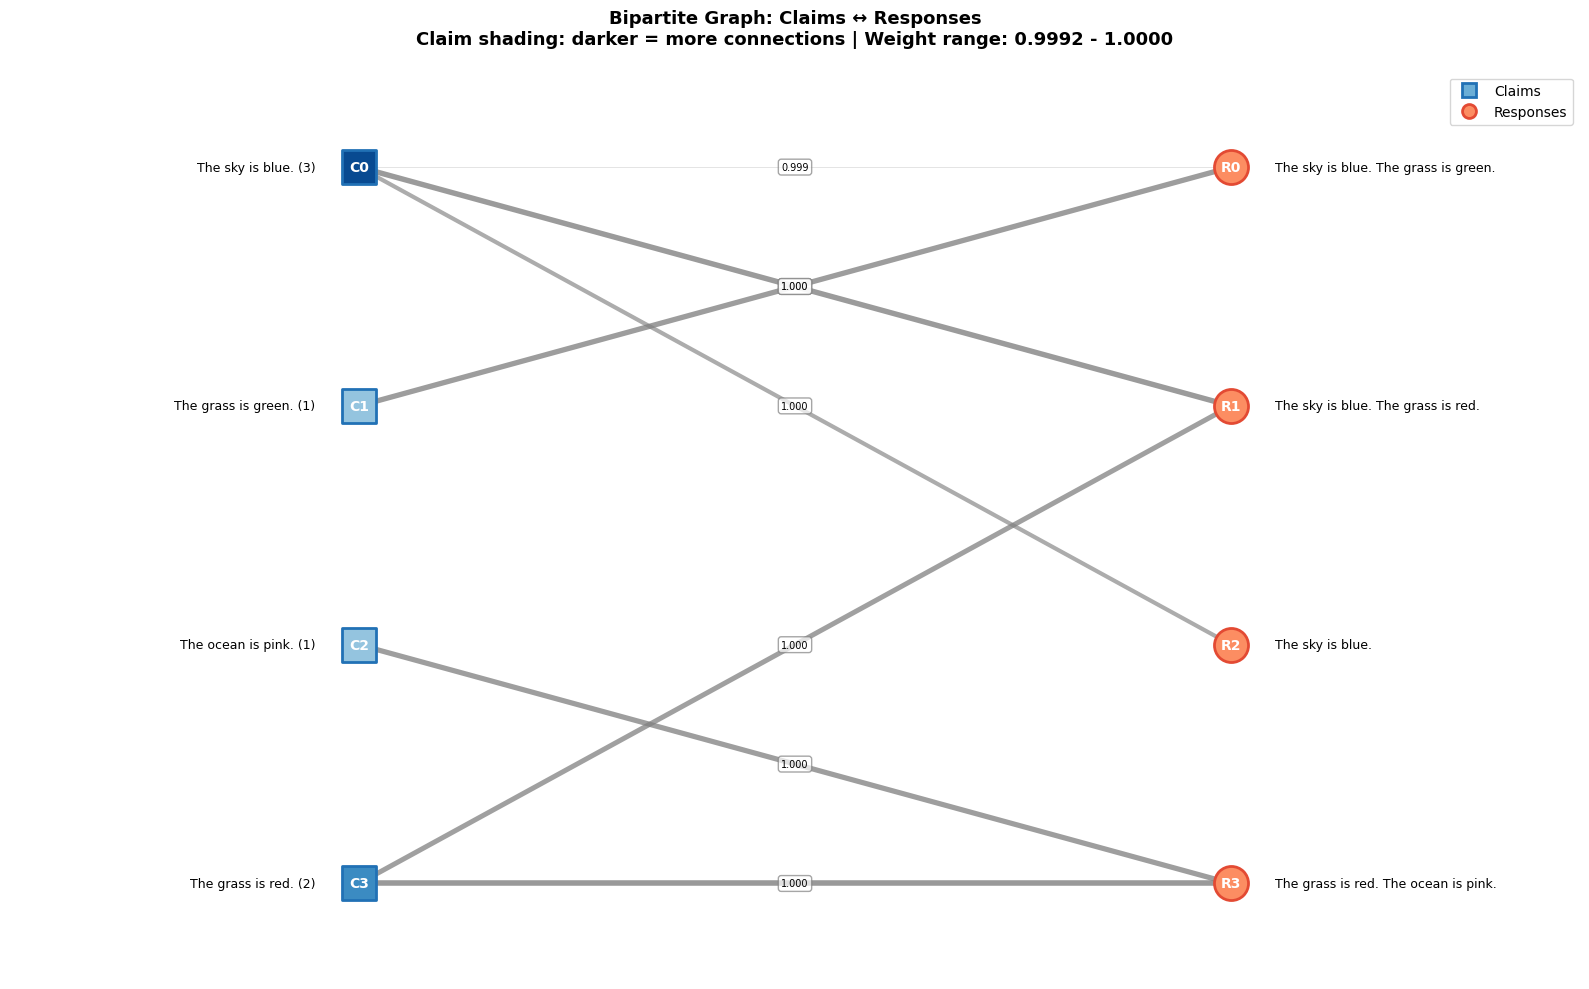

uqlm.longform.black_box.graphuq - DEBUG - Calculating claim node graph metrics...
uqlm.longform.black_box.graphuq - DEBUG - Raw degrees (number of connections): {0: 3, 1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 1, 7: 2}
uqlm.longform.black_box.graphuq - DEBUG - Bipartite degree centrality (normalized) for all nodes: {0: 0.75, 1: 0.25, 2: 0.25, 3: 0.5, 4: 0.5, 5: 0.5, 6: 0.25, 7: 0.5}
uqlm.longform.black_box.graphuq - DEBUG - Bipartite betweenness centrality for all nodes: {0: 0.7777777777777778, 1: 0.0, 2: 0.0, 3: 0.5555555555555556, 4: 0.3333333333333333, 5: 0.6666666666666666, 6: 0.0, 7: 0.3333333333333333}
uqlm.longform.black_box.graphuq - DEBUG - PageRank for all nodes: {0: 0.20134315843766337, 1: 0.07980490186102453, 2: 0.08085208716724321, 3: 0.13799985253406888, 4: 0.14360656447126746, 5: 0.1344623971724611, 6: 0.07580318756227641, 7: 0.14612785079399498}
uqlm.longform.black_box.graphuq - DEBUG - Bipartite closeness centrality for all nodes: {0: 0.7142857142857143, 1: 0.4166666666666667, 

Probability mode results:
{
    "claim": "The sky is blue.",
    "original_response": true,
    "scores": {
        "raw_degree": 3.0,
        "degree_centrality": 0.75,
        "betweenness_centrality": 0.7777777777777778,
        "closeness_centrality": 0.7142857142857143,
        "page_rank": 0.20134315843766337
    },
    "scorer_type": "graphuq"
}
{
    "claim": "The grass is green.",
    "original_response": true,
    "scores": {
        "raw_degree": 1.0,
        "degree_centrality": 0.25,
        "betweenness_centrality": 0.0,
        "closeness_centrality": 0.4166666666666667,
        "page_rank": 0.07980490186102453
    },
    "scorer_type": "graphuq"
}
{
    "claim": "The ocean is pink.",
    "original_response": false,
    "scores": {
        "raw_degree": 1.0,
        "degree_centrality": 0.25,
        "betweenness_centrality": 0.0,
        "closeness_centrality": 0.38461538461538464,
        "page_rank": 0.08085208716724321
    },
    "scorer_type": "graphuq"
}
{
    "cla

In [ ]:
# Run GraphUQ evaluation with probability-weighted edges (0.0 to 1.0)

result_prob = await graphuq_scorer.a_evaluate(
    responses, 
    original_claim_set, 
    sampled_claim_sets,
    use_entailment_prob=True,  # Use entailment probabilities as edge weights; requires nli model to return probs
    show_graph=True
    # save_graph_path="graphuq_probability.html"
)

print("Probability mode results:")
for res in result_prob:
    print(res.model_dump_json(indent=4))